In [13]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

import seaborn

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [14]:
yelp = pd.read_csv('YelpData.csv')

In [78]:
# Convert rating to high (4,5) or low (1,2,3)
yelp['rating'] = np.where(yelp['stars'] >= 4, 'high','low')
yelp.head(1)

,stars,votes_cool,votes_funny,votes_useful,Cheap,Moderate,Expensive,VeryExpensive,American,Chinese,...,Indian,Italian,Greek,Mediterranean,Mexican,Thai,Vietnamese,Others,Review,rating
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,This location is out of business. I drove by i...,low


## Task A

In [79]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(yelp, test_size=0.25, random_state=123)

In [80]:
x_train = train.drop(['stars', 'Review', 'rating'], axis=1)
y_train = train['rating']

x_test = test.drop(['stars', 'Review', 'rating'], axis=1)
y_test = test['rating']

### Logistic Regression

In [81]:
import sklearn
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg_classifier = logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_testAccuracy = logreg.score(x_test, y_test)

print 'Logistic Regression Accuracy:', logreg_testAccuracy

Logistic Regression Accuracy: 0.6844


### KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,101)
accuracies = []
for k in k_range:
    if k % 10 == 0:
        print 'Performing classifier', k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_classifier = knn.fit(x_train, y_train)
    knn_accuracy = knn.score(x_test, y_test)
    accuracies.append(knn_accuracy)


Performing classifier 10
Performing classifier 20
Performing classifier 30
Performing classifier 40
Performing classifier 50
Performing classifier 60
Performing classifier 70
Performing classifier 80
Performing classifier 90
Performing classifier 100


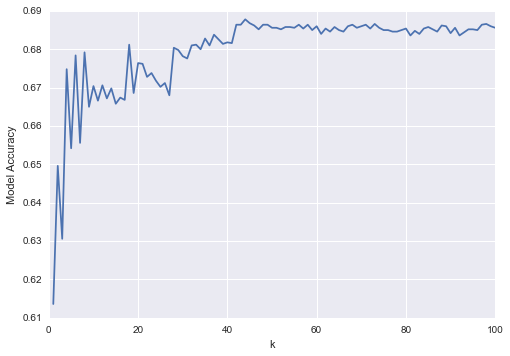

In [12]:
plot(k_range, accuracies)
xlabel('k')
ylabel('Model Accuracy')

In [13]:
s_accuracies = Series(accuracies)

k = s_accuracies.idxmax() + 1
knn = KNeighborsClassifier(n_neighbors=k)
knn_classifier = knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
knn_accuracy = knn.score(x_test, y_test)

print 'KNN (k = %i) Accuracy: %.4f' % (k, knn_accuracy)

KNN (k = 44) Accuracy: 0.6878


## Naive Bayes

In [14]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb_classifier = bnb.fit(x_train, y_train)
bnb_predict = bnb.predict(x_test)
bnb_accuracy = bnb.score(x_test, y_test)

print 'Bernoulli Naive Bays Accuracy:', bnb_accuracy

Bernoulli Naive Bays Accuracy: 0.6816


In [15]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb_classifier = mnb.fit(x_train, y_train)
mnb_predict = mnb.predict(x_test)
mnb_accuracy = mnb.score(x_test, y_test)

print 'Multinomial Naive Bayes Accuracy:', mnb_accuracy

Multinomial Naive Bayes Accuracy: 0.6812


## Part B

## Part C

## Part D

In [7]:
ss = pd.read_csv('YelpNoHeader+results.csv', header = None)
ss.head(1)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2,2,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,1,CLOSED This JB s locati...,2,-2


In [8]:
ss['rating'] = np.where(ss[0] >= 4, 'high','low')

In [9]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(ss, test_size=0.25, random_state=123)

x_train = train[21].reshape(-1,1)
y_train = train['rating'].reshape(-1,1)

x_test = test[21].reshape(-1,1)
y_test = test['rating'].reshape(-1,1)

In [10]:
import sklearn
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg_classifier = logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_testAccuracy = logreg.score(x_test, y_test)

print 'Logistic Regression Accuracy:', logreg_testAccuracy

Logistic Regression Accuracy: 0.7002


C:\Users\egonz\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Part E

In [17]:
yelp.head(1)

,stars,votes_cool,votes_funny,votes_useful,Cheap,Moderate,Expensive,VeryExpensive,American,Chinese,...,Japanese,Indian,Italian,Greek,Mediterranean,Mexican,Thai,Vietnamese,Others,Review
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,This location is out of business. I drove by i...


In [40]:
import nltk
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

yelpsub = yelp.sample(500)

# Tokenize all job descriptions from sample
yelpsub['tokenized_strip'] = yelpsub.apply(lambda row: row['Review'].decode('utf-8').strip(),axis=1)
yelpsub['tokenized'] = yelpsub.apply(lambda row: nltk.word_tokenize(row['tokenized_strip']),axis=1)

In [41]:
reviews = []
for index, value in yelpsub.iterrows():
    reviews.append(value['tokenized'])

In [82]:
reviews_lower = []
for review in reviews:
    review_lower = []
    for token in review:
        token_lower = token.lower()
        review_lower.append(token_lower)
    reviews_lower.append(review_lower)

In [90]:
reviews = reviews_lower

all_count = 0
for review in reviews:
    for token in review:
        all_count += 1

all_count

71824

In [91]:
single_dict = {}
for review in reviews:
    for token in review:
        if token in single_dict:
            single_dict[token] += 1
        else:
            single_dict[token] = 1

In [121]:
bigrams = []
for review in reviews:
    small_list = []
    for i in range(len(review[0:-1])):
        small_list.append((review[i], review[i+1]))
    bigrams.append(small_list)

bigram_dict = {}
for review in bigrams:
    for tup in review:
        tup_space = ' '.join(tup)
        if tup_space in bigram_dict:
            bigram_dict[tup_space] += 1
        else:
            bigram_dict[tup_space] = 1

In [122]:
import math

zipped = []
for bigram in bigram_dict: 
    bigram_sep = bigram.split()
    p_bi = bigram_dict[bigram] / (all_count * 1.0)
    p_word1 = single_dict[bigram_sep[0]] / (all_count * 1.0)
    p_word2 = single_dict[bigram_sep[1]] / (all_count * 1.0)
    pmi = math.log(p_bi / (p_word1 * p_word2) * 1.0)
    
    
    zipped.append((bigram, bigram_dict[bigram], bigram_sep[0], single_dict[bigram_sep[0]], bigram_sep[1], single_dict[bigram_sep[1]], pmi))

In [123]:
zipped_sorted = sorted(zipped, key=lambda x: x[6])
zipped_sorted.reverse()
for a,b,c,d,e,f,g in zipped_sorted:
    print a, g

baseball teams 11.181973961
maguey chichicapa 11.181973961
twitter handles 11.181973961
bucolic simplicity 11.181973961
sloppily wasted 11.181973961
chichicapa mescal 11.181973961
esparza comida 11.181973961
circle k 11.181973961
spork sharpened 11.181973961
nye proved 11.181973961
toward gate 11.181973961
cell phone/pda 11.181973961
dip.crab puffspork 11.181973961
lamb chops 11.181973961
baffling installed 11.181973961
mandarin oranges 11.181973961
spoon.the negra 11.181973961
posters newspaper 11.181973961
further accentuated 11.181973961
seemingly remixed 11.181973961
slick loungey-type 11.181973961
thinner spaghettini 11.181973961
e. jefferson 11.181973961
bippity boppity 11.181973961
tex mex 11.181973961
appoligized becasue 11.181973961
fast-food burgers.if 11.181973961
saucesoup dumplings.. 11.181973961
kitsune udon 11.181973961
outward appearances 11.181973961
weather.chillie rellleno 11.181973961
jimmy johns 11.181973961
streetphoenix 85004is 11.181973961
scary tweaker 11.18197

## Task F